# Part 2 Task 4.9

1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).
2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.
3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
3B. In a markdown cell beneath your histogram, describe what the histogram demonstrates.
4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.
5. Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)
6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
6B. In a markdown cell beneath your line chart, describe what the line chart shows.
7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
7B. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.
8. Export your visualizations as “.png” files in your relevant project folder.
9. Save your notebook from part 2 of this Exercise’s task.
10. Submit your notebooks for both the first and second parts of this task to your tutor for review.

## 1. Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
ords_prods_all= pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_all.pkl'))

In [4]:
# Checking dataframe
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,First Name,Surnam,Gender,State,Age,date_joined,n_dependants,fam_status,income,merged
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,both,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
ords_prods_all.shape

(32434212, 35)

## 3. histogram of time_of_day

[Text(0.5, 0, 'Hour of the day'), Text(0.5, 1.0, 'Busiest hour by Frequency')]

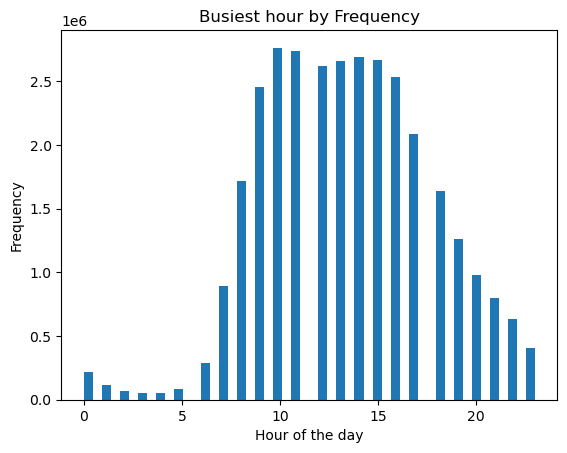

In [6]:
hist = ords_prods_all['time_of_day'].plot.hist(bins=50)
hist.set(xlabel = 'Hour of the day', title=  'Busiest hour by Frequency')

In [7]:
# export chart as figure
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_time_of_day.png'))

In [7]:
#Checking corresponding data 
ords_prods_all['time_of_day'].describe()

count    3.243421e+07
mean     1.342500e+01
std      4.246351e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.300000e+01
75%      1.600000e+01
max      2.300000e+01
Name: time_of_day, dtype: float64

## 3B. 
The histogram of order hour of the day demonstrates the frecuency of each hour of orders placed. Most orders are place between the hours of 7 hours and 18 hours. 

## 4. Bar Chart for loyalty flag

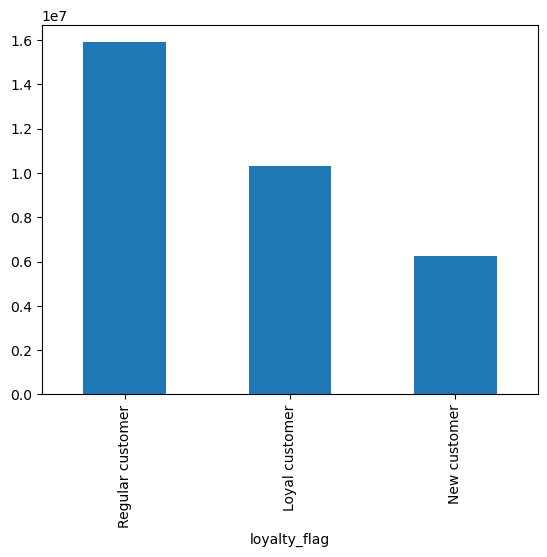

In [23]:
bar = ords_prods_all['loyalty_flag'].value_counts().plot.bar()

In [24]:
# export chart as figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

## 5. Linegraph on Prices and time of day 

#### Creating a Sample 


In [9]:
# Set the seed
np.random.seed(4)
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [10]:
# create a list holding True/False values to the test np.random.rant() <= 0.7
dev = np.random.rand(len(ords_prods_all)) <= 0.7

In [11]:
# Store 70% of the sample in the dataframe big
big = ords_prods_all[dev]

In [12]:
# Store 30% of sample dataframe small
small = ords_prods_all[~dev]

In [13]:
# checking for full dataframe
len(ords_prods_all)

32434212

In [14]:
# checking for big and small together
len(big) + len (small)

32434212

In [15]:
# Create dataframe for small 
df_2 = small [['time_of_day', 'prices']]

### Create line graph with small sample

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


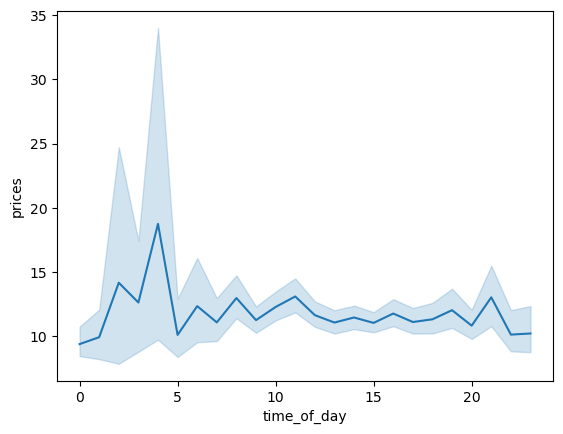

In [16]:
# create linechart
line = sns.lineplot(data = df_2, x = 'time_of_day', y = 'prices')

In [26]:
# export chart as figure
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_time_prices.png'))

## 6. line graph on age and n_dependants

In [17]:
# Create dataframe for small 
df_3 = small [['Age', 'n_dependants']]

/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jazmingutierrez/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


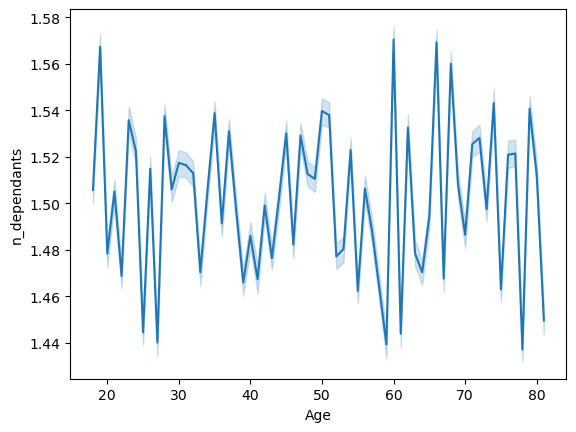

In [18]:
# create linechart
line = sns.lineplot(data = , x = 'Age', y = 'n_dependants')

## 6B. 
The line chart describes that there is no relationship between age and number of dependants.

In [25]:
# export chart as figure
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

## 7. Scatterplot between Age and income

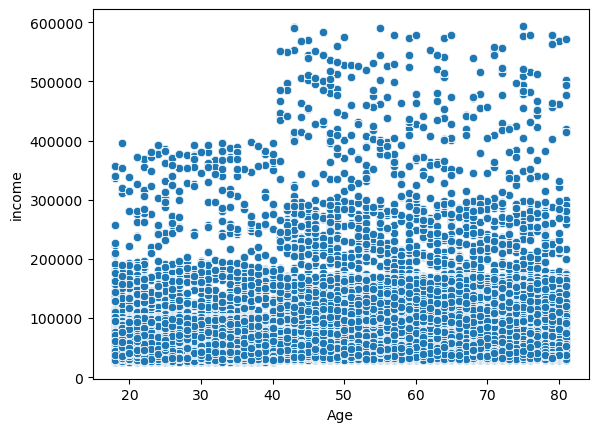

In [28]:
scat=sns.scatterplot(x = 'Age', y = 'income',data = ords_prods_all)

## 7B. 
If age is higher then income increases, the scatterplot deomnstrates that younger population has less spending power then older population. 

In [29]:
# export chart as figure
scat.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_age_income.png'))